In [61]:
import os
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pt 
import numpy as np


In [72]:
nRowsRead =303

df_dataset = pd.read_csv('./processed.cleveland.csv', delimiter=',', nrows = nRowsRead)
df_dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_dataset.head()

# This is a beauty!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [73]:
df_dataset.dataframeName = 'HeartDiseases.csv'
nRow, nCol = df_dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 302 rows and 14 columns


Merging multipel CSV files 

In [ ]:

a = pd.read_csv("filea.csv")
b = pd.read_csv("fileb.csv")
b = b.dropna(axis=1)
merged = a.merge(b, on='title')
merged.to_csv("output.csv", index=False)

### Here we want to check the distribution of the data

In [94]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()

    # Here we want to pick a column that have at least 1 and 50 unique values
    df = df[[ col for col in df if nunique[col] > 1 and nunique[col] < 50  ]]

    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = round((nCol + nGraphPerRow) -1 / nGraphPerRow)
    plt.figure( num = None, figsize = ( 6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')

    for i in range(min(nCol, nGraphShown)):
        plt.subplot( nGraphRow, nGraphPerRow , i + 1)
        columnDf = df.iloc[:, i]

        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            
        plt.ylabel('counts')
        plt.xticks(rotation = 90)     
        plt.title(f'{columnNames[i]} (column{i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad= 1.0)  
    plt.show()     

    

## Here we define the correlation matrix

In [101]:
# Distribution graphs of the column data
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    # Keep the columns with more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1 ]]

    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({ df.shape[1]}) is less than 2')
        return
    corr = df.corr()  
    plt.figure(num = None, figsize =(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90)  
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)

## Here we have the Scatter and density plots

In [114]:
def plotScatterMatrix(df, plotSize, textSize):

    # Keep only numerical values
    df = df.select_dtypes(include = [np.number])

    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Pay attention here, we want to reduce the number of columns for matrix inversion of kernel density plots
    columnNames = list(df)
    if len(columnNames) > 10:
       columnNames = columnNames[ :10]
    df = df[columnNames]
    

    # This is not good! we need to change it into seaborn plots
    ax = pd.plotting.scatter_matrix(df, alpha=0.90, figsize=[plotSize, plotSize], diagonal='kde') 
    corrs = df.corr().values 
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' %corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size = textSize)

    plt.suptitle('Scatter and Desity Plot')   
    plt.show()  


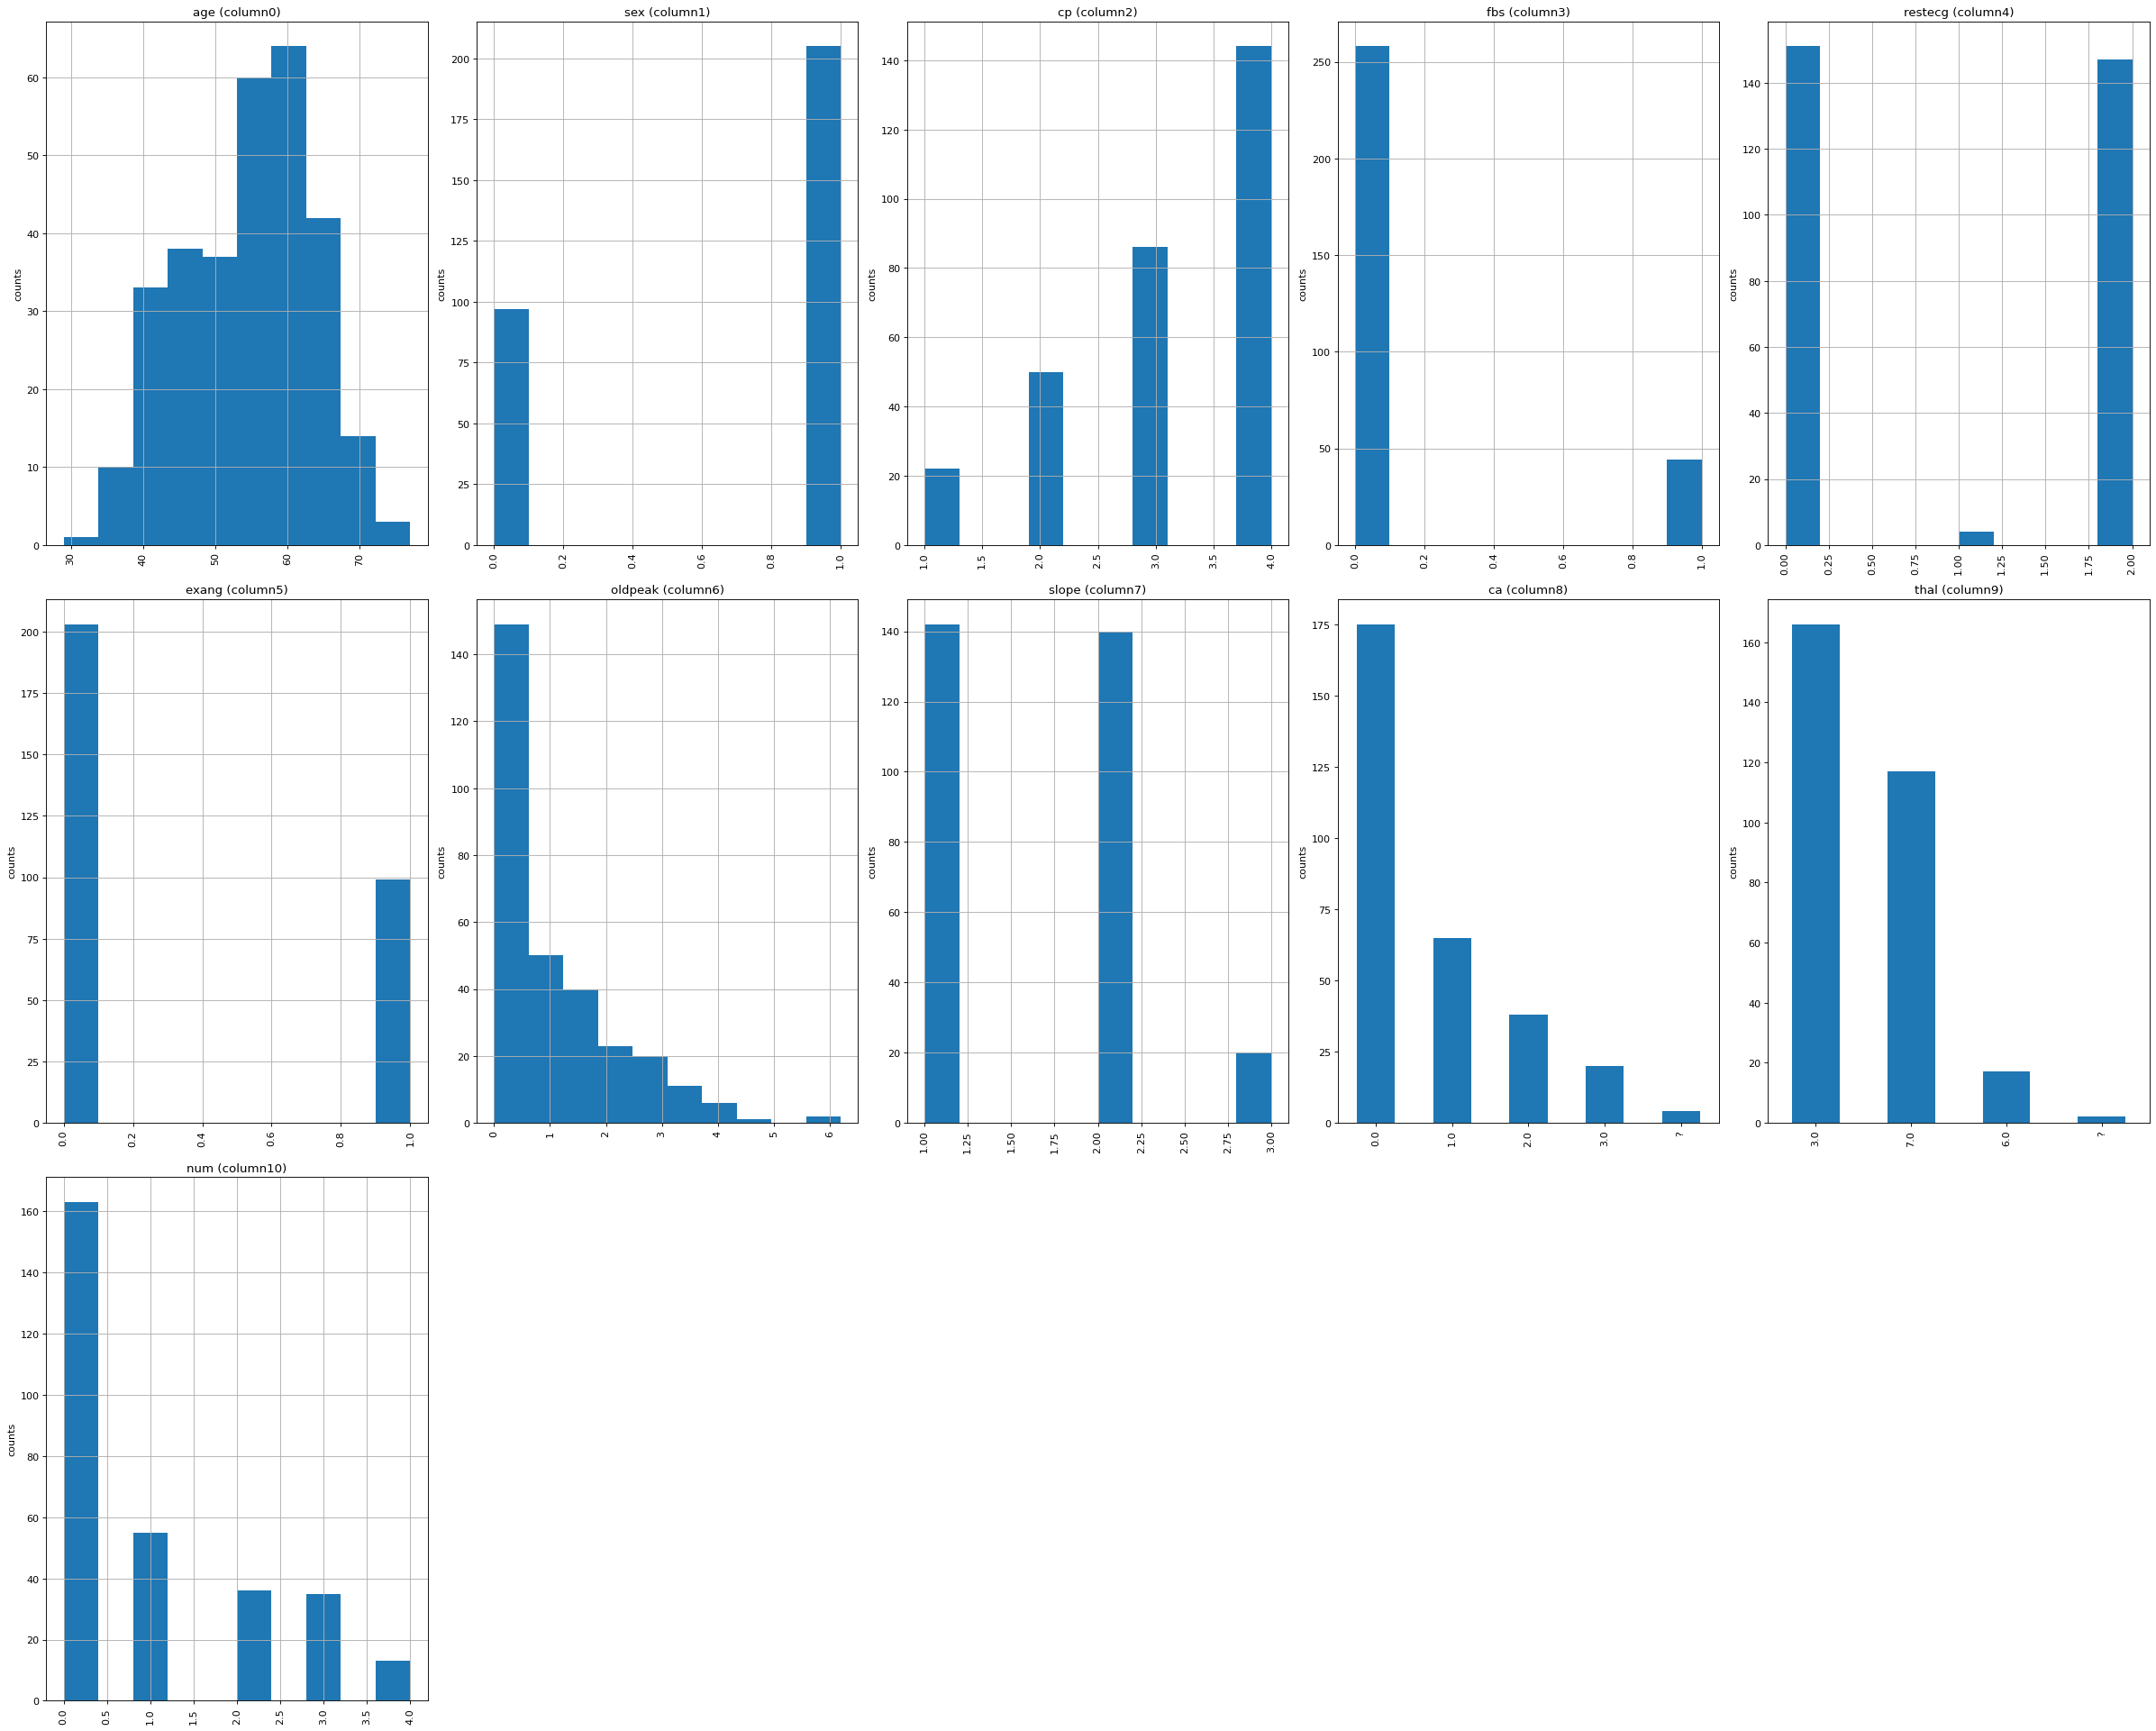

In [97]:

plotPerColumnDistribution(df_dataset, 15, 5)

C:\Users\najmi\AppData\Local\Temp\ipykernel_24128\3035183895.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
C:\Users\najmi\AppData\Local\Temp\ipykernel_24128\3035183895.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


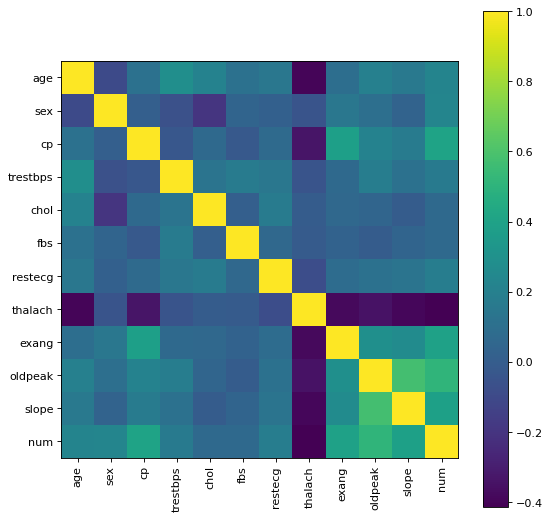

In [102]:
plotCorrelationMatrix(df_dataset, 8)

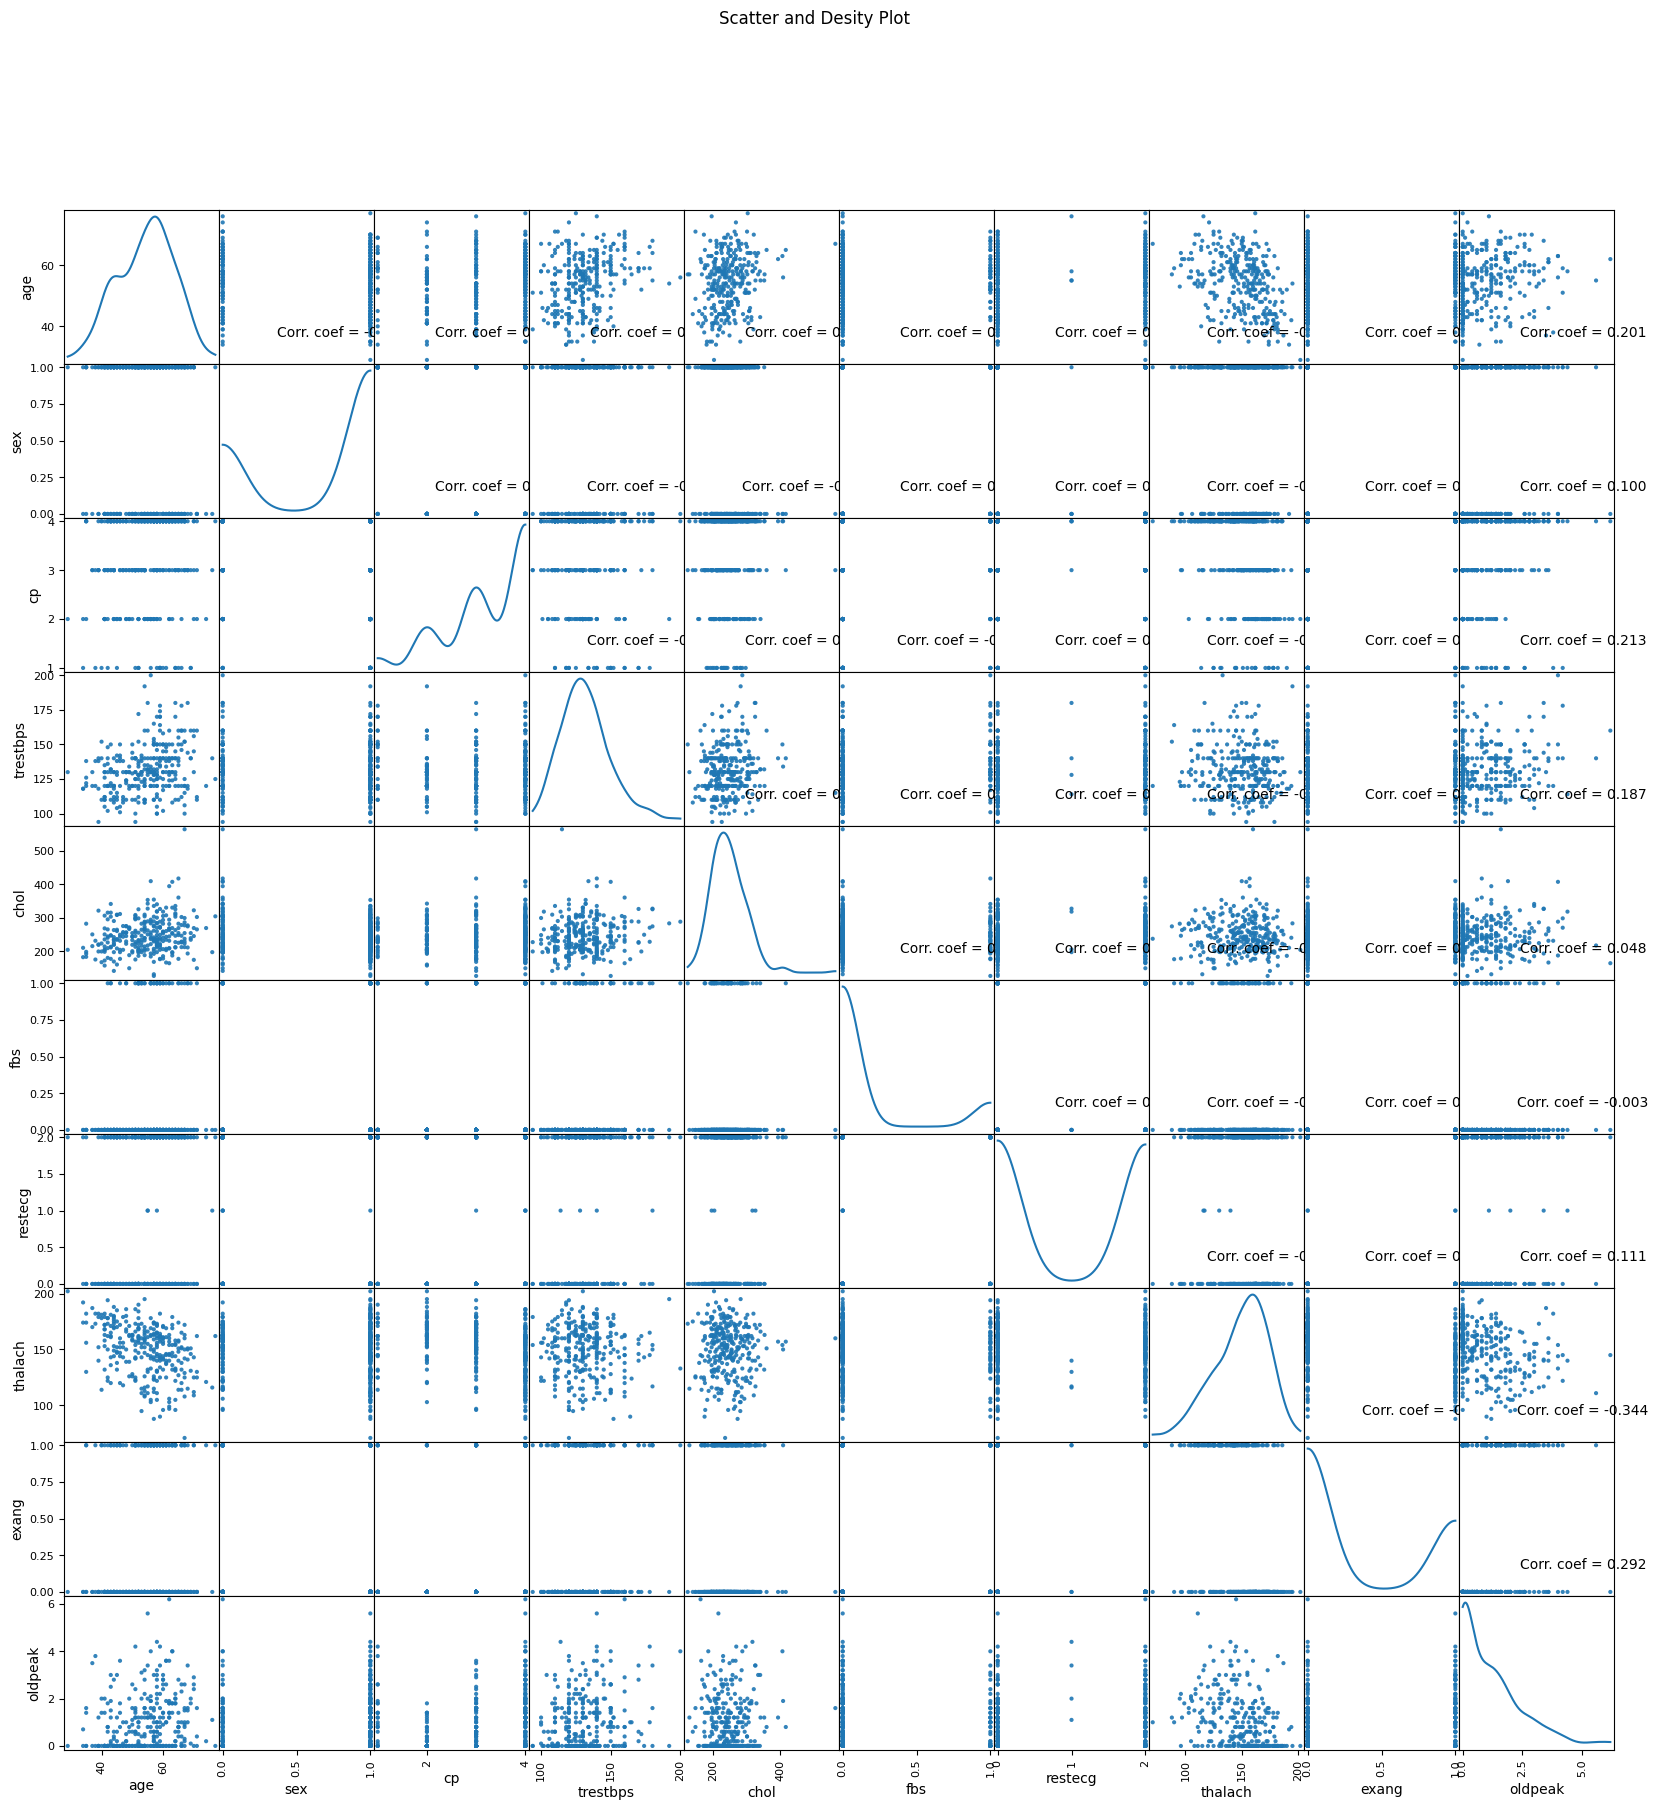

In [115]:
plotScatterMatrix(df_dataset, 20, 10)